# Data Load & Description

In [2]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

# california 객체는 dictionary와 유사하게 동작함
# 데이터는 'data' 키에, 타겟(주택 가격)은 'target' 키에 저장되어 있음
X, y = california.data, california.target

# 데이터 형태 확인
print("Data shape: ", X.shape)  # 캘리포니아 데이터셋은 20640개의 샘플과 8개의 피처로 이루어짐
print("Target shape: ", y.shape)  # 타겟은 20640개의 주택 가격

Data shape:  (20640, 8)
Target shape:  (20640,)


In [3]:
from sklearn.datasets import fetch_california_housing

# 데이터 로드
california = fetch_california_housing()

# 데이터셋 설명 출력
print(california['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

# Regression Models

## 모델 학습 및 성능 평가

###선형 모델

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# 데이터 로드
california = fetch_california_housing()
X, y = california.data, california.target

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 로드
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=0.1) #alpha는 계수에 대한 규제 정도를 나타냄. 값이 높을수록 규제 정도가 커짐.
lasso_reg = Lasso(alpha=0.01) #alpha는 계수에 대한 규제 정도를 나타냄. 값이 높을수록 규제 정도가 커짐.
#lasso_reg = Lasso(alpha=0.1) #MSE 0.6135115198058131로 오히려 높아짐 underfitting

# 모델 학습
lin_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

# 예측 및 성능 평가
for model in [lin_reg, ridge_reg, lasso_reg]:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__} MSE: {mse}")


LinearRegression MSE: 0.555891598695242
Ridge MSE: 0.5558827543113779
Lasso MSE: 0.5444491581246518


### 비선형 모델(MSE가 작음)

In [4]:
# pip install lightgbm

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 데이터 로드
california = fetch_california_housing()
X, y = california.data, california.target

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의
gb_reg = GradientBoostingRegressor()
xgb_reg = XGBRegressor()
lgb_reg = LGBMRegressor()

# 모델 학습
gb_reg.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train)
lgb_reg.fit(X_train, y_train)

# 예측 및 성능 평가
for model in [gb_reg, xgb_reg, lgb_reg]:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__} MSE: {mse}")


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
GradientBoostingRegressor MSE: 0.2940787695751335
XGBRegressor MSE: 0.22458289556216388
LGBMRegressor MSE: 0.21484820209255617


## 모델 해석

### 비선형 모델

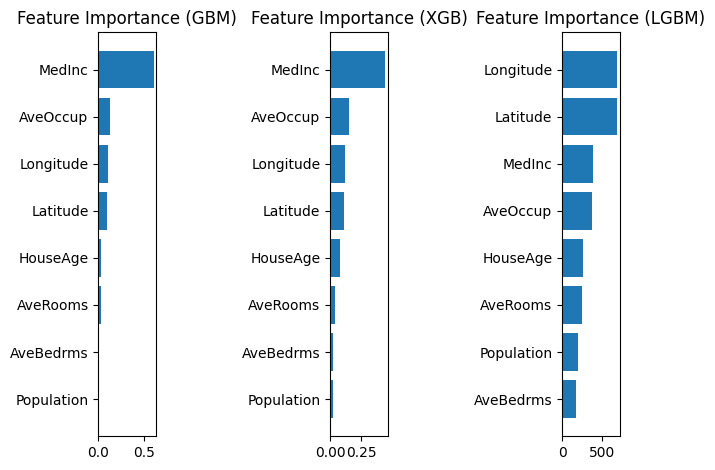

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Gradient Boosting
feature_importance = gb_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 2
plt.subplot(1, 3, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(california.feature_names)[sorted_idx])
plt.title('Feature Importance (GBM)')

# XGBoost
feature_importance = xgb_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 2
plt.subplot(1, 3, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(california.feature_names)[sorted_idx])
plt.title('Feature Importance (XGB)')

# LightGBM
feature_importance = lgb_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 2
plt.subplot(1, 3, 3)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(california.feature_names)[sorted_idx])
plt.title('Feature Importance (LGBM)')

plt.tight_layout()
plt.subplots_adjust(wspace=3)  # 그림 간의 가로 간격 조정
plt.show()

### 선형 모델(해석이 더 잘 됨)

In [9]:
import pandas as pd
import statsmodels.api as sm

# 데이터 로드
data = fetch_california_housing()
X, y = data.data, data.target

# 데이터를 pandas DataFrame으로 변환
X_df = pd.DataFrame(X, columns=data.feature_names)
y_df = pd.DataFrame(y, columns=['Price'])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# statsmodels는 절편(intercept)를 자동으로 추가하지 않으므로 수동으로 추가
X_train_with_intercept = sm.add_constant(X_train)
X_test_with_intercept = sm.add_constant(X_test)

# 모델 생성 및 학습
model = sm.OLS(y_train, X_train_with_intercept)
results = model.fit()

# 모델 요약 결과 출력
print(results.summary())
# Population만 빼고 다 유의함을 알 수 있다.(인구는 영향이 없다.)
# 지금의 const 값(-37.0233)은 나머지 변수가 전부 0 일때의 값이기 때문에 의미가 없다! -> 평균중심화가 필요하다

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:55:20   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.0233      0.728    -50.835      0.0

# 회귀 모델을 위한 데이터 처리

## Log Transformation

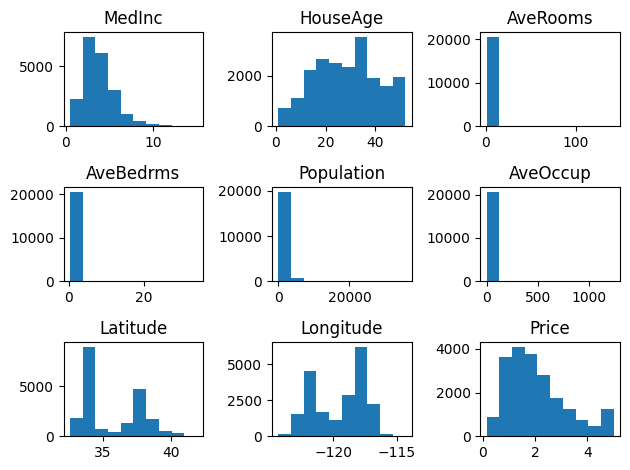

In [10]:
plt.subplot(3, 3, 1)
plt.hist(X_df['MedInc'])
plt.title('MedInc')

plt.subplot(3, 3, 2)
plt.hist(X_df['HouseAge'])
plt.title('HouseAge')

plt.subplot(3, 3, 3)
plt.hist(X_df['AveRooms'])
plt.title('AveRooms')

plt.subplot(3, 3, 4)
plt.hist(X_df['AveBedrms'])
plt.title('AveBedrms')

plt.subplot(3, 3, 5)
plt.hist(X_df['Population'])
plt.title('Population')

plt.subplot(3, 3, 6)
plt.hist(X_df['AveOccup'])
plt.title('AveOccup')

plt.subplot(3, 3, 7)
plt.hist(X_df['Latitude'])
plt.title('Latitude')

plt.subplot(3, 3, 8)
plt.hist(X_df['Longitude'])
plt.title('Longitude')

plt.subplot(3, 3, 9)
plt.hist(y_df['Price'])
plt.title('Price')

plt.tight_layout()
plt.show()

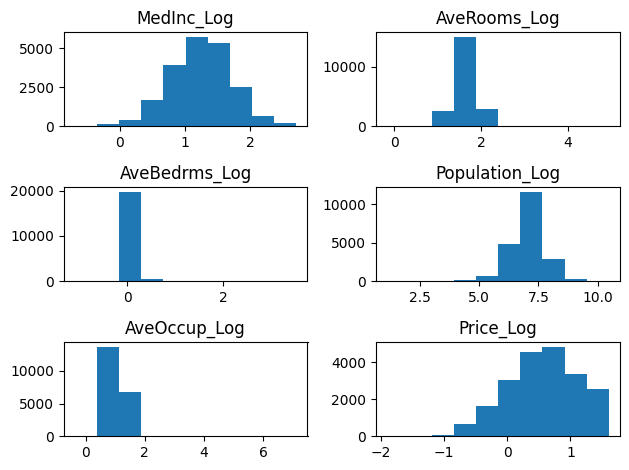

In [11]:
X_df['MedInc_Log'] = np.log(X_df['MedInc'])
X_df['AveRooms_Log'] = np.log(X_df['AveRooms'])
X_df['AveBedrms_Log'] = np.log(X_df['AveBedrms'])
X_df['Population_Log'] = np.log(X_df['Population'])
X_df['AveOccup_Log'] = np.log(X_df['AveOccup'])
y_df['Price_Log'] = np.log(y_df['Price'])

plt.subplot(3, 2, 1)
plt.hist(X_df['MedInc_Log'])
plt.title('MedInc_Log')

plt.subplot(3, 2, 2)
plt.hist(X_df['AveRooms_Log'])
plt.title('AveRooms_Log')

plt.subplot(3, 2, 3)
plt.hist(X_df['AveBedrms_Log'])
plt.title('AveBedrms_Log')

plt.subplot(3, 2, 4)
plt.hist(X_df['Population_Log'])
plt.title('Population_Log')

plt.subplot(3, 2, 5)
plt.hist(X_df['AveOccup_Log'])
plt.title('AveOccup_Log')

plt.subplot(3, 2, 6)
plt.hist(y_df['Price_Log'])
plt.title('Price_Log')

plt.tight_layout()
plt.show()

# AveBedrms_Log,AveRooms_Log,AveOccup_Log 이상치가 있음을 볼 수 있음 -> 제거하는 것도 하나의 방법!
# AveRooms_Log,Population_Log 정규분포의 형태를 가지고 있음

In [12]:
import pandas as pd
import statsmodels.api as sm

# 데이터 추출
X_df_log = X_df[['MedInc_Log', 'HouseAge', 'AveRooms_Log', 'AveBedrms_Log', 'Population_Log', 'AveOccup_Log', 'Latitude', 'Longitude']]
y_df_log = y_df[['Price_Log']]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_df_log, y_df_log, test_size=0.2, random_state=42)

# statsmodels는 절편(intercept)를 자동으로 추가하지 않으므로 수동으로 추가
X_train_with_intercept = sm.add_constant(X_train)
X_test_with_intercept = sm.add_constant(X_test)

# 모델 생성 및 학습
model = sm.OLS(y_train, X_train_with_intercept)
results = model.fit()

# 모델 요약 결과 출력
print(results.summary())
# Population도 유의하다고 나옴

                            OLS Regression Results                            
Dep. Variable:              Price_Log   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     4307.
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:18:20   Log-Likelihood:                -4809.6
No. Observations:               16512   AIC:                             9637.
Df Residuals:                   16503   BIC:                             9707.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -21.1159      0.343    -61.

In [13]:
# 모델 로드
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=0.1) #alpha는 계수에 대한 규제 정도를 나타냄. 값이 높을수록 규제 정도가 커짐.
lasso_reg = Lasso(alpha=0.01) #alpha는 계수에 대한 규제 정도를 나타냄. 값이 높을수록 규제 정도가 커짐.

# 모델 학습
lin_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

# 예측 및 성능 평가
for model in [lin_reg, ridge_reg, lasso_reg]:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__} MSE: {mse}")

LinearRegression MSE: 0.11009124616206975
Ridge MSE: 0.11009018491658577
Lasso MSE: 0.11537584733200193


In [14]:
# 모델 정의
gb_reg = GradientBoostingRegressor()
xgb_reg = XGBRegressor()
lgb_reg = LGBMRegressor()

# 모델 학습
gb_reg.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train)
lgb_reg.fit(X_train, y_train)

# 예측 및 성능 평가
for model in [gb_reg, xgb_reg, lgb_reg]:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__} MSE: {mse}")

/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 0.573569
GradientBoostingRegressor MSE: 0.06744254801228824
XGBRegressor MSE: 0.052175431841092135
LGBMRegressor MSE: 0.0521780157733372


## Mean Centering

In [15]:
X_df_original = X_df.iloc[:, :8]

In [16]:
#오류 메시지를 없애주는 코드
pd.options.mode.chained_assignment = None

In [17]:
X_df_original['Medinc_0'] = X_df_original['MedInc'] - X_df_original['MedInc'].mean()
X_df_original['HouseAge_0'] = X_df_original['HouseAge'] - X_df_original['HouseAge'].mean()
X_df_original['AveRooms_0'] = X_df_original['AveRooms'] - X_df_original['AveRooms'].mean()
X_df_original['AveBedrms_0'] = X_df_original['AveBedrms'] - X_df_original['AveBedrms'].mean()
X_df_original['Population_0'] = X_df_original['Population'] - X_df_original['Population'].mean()
X_df_original['AveOccup_0'] = X_df_original['AveOccup'] - X_df_original['AveOccup'].mean()
X_df_original['Latitude_0'] = X_df_original['Latitude'] - X_df_original['Latitude'].mean()
X_df_original['Longitude_0'] = X_df_original['Longitude'] - X_df_original['Longitude'].mean()

In [18]:
import pandas as pd
import statsmodels.api as sm

# 데이터 추출
X_df_mean_centered = X_df_original[['Medinc_0', 'HouseAge_0', 'AveRooms_0', 'AveBedrms_0', 'Population_0', 'AveOccup_0', 'Latitude_0', 'Longitude_0']]
y_df = y_df[['Price']]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_df_mean_centered, y_df, test_size=0.2, random_state=42)

# statsmodels는 절편(intercept)를 자동으로 추가하지 않으므로 수동으로 추가
X_train_with_intercept = sm.add_constant(X_train)
X_test_with_intercept = sm.add_constant(X_test)

# 모델 생성 및 학습
model = sm.OLS(y_train, X_train_with_intercept)
results = model.fit()

# 모델 요약 결과 출력
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:23:19   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.0679      0.006    369.104   

In [19]:
import pandas as pd
import statsmodels.api as sm

# 데이터 로드
data = fetch_california_housing()
X, y = data.data, data.target

# 데이터를 pandas DataFrame으로 변환
X_df = pd.DataFrame(X, columns=data.feature_names)
y_df = pd.DataFrame(y, columns=['Price'])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# statsmodels는 절편(intercept)를 자동으로 추가하지 않으므로 수동으로 추가
X_train_with_intercept = sm.add_constant(X_train)
X_test_with_intercept = sm.add_constant(X_test)

# 모델 생성 및 학습
model = sm.OLS(y_train, X_train_with_intercept)
results = model.fit()

# 모델 요약 결과 출력
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:23:24   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.0233      0.728    -50.835      0.0

# 전처리 시도

## 1) 평균 중심화 후 log 씌우기

In [75]:
X_df_center=X_df_original.iloc[:,8:]
X_df_center

,Medinc_0,HouseAge_0,AveRooms_0,AveBedrms_0,Population_0,AveOccup_0,Latitude_0,Longitude_0
0,4.454529,12.360514,1.555127,-0.072866,-1103.476744,-0.515100,2.248139,-2.660296
1,4.430729,-7.639486,0.809137,-0.124795,975.523256,-0.960813,2.228139,-2.650296
2,3.386729,23.360514,2.859136,-0.023229,-929.476744,-0.268395,2.218139,-2.670296
3,1.772429,23.360514,0.388352,-0.023616,-867.476744,-0.522710,2.218139,-2.680296
4,-0.024471,23.360514,0.852854,-0.015594,-860.476744,-0.889188,2.218139,-2.680296
...,...,...,...,...,...,...,...,...
20635,-2.310371,-3.639486,-0.383545,0.036658,-580.476744,-0.510049,3.848139,-1.520296
20636,-1.313871,-10.639486,0.685035,0.219114,-1069.476744,0.052152,3.858139,-1.640296
20637,-2.170671,-11.639486,-0.223457,0.023417,-418.476744,-0.745020,3.798139,-1.650296
20638,-2.003471,-10.639486,-0.099487,0.075245,-684.476744,-0.947446,3.798139,-1.750296


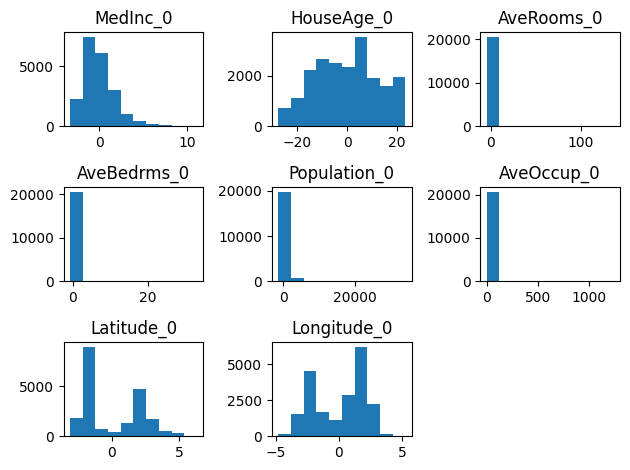

In [76]:
plt.subplot(3, 3, 1)
plt.hist(X_df_center['Medinc_0'])
plt.title('MedInc_0')

plt.subplot(3, 3, 2)
plt.hist(X_df_center['HouseAge_0'])
plt.title('HouseAge_0')

plt.subplot(3, 3, 3)
plt.hist(X_df_center['AveRooms_0'])
plt.title('AveRooms_0')

plt.subplot(3, 3, 4)
plt.hist(X_df_center['AveBedrms_0'])
plt.title('AveBedrms_0')

plt.subplot(3, 3, 5)
plt.hist(X_df_center['Population_0'])
plt.title('Population_0')

plt.subplot(3, 3, 6)
plt.hist(X_df_center['AveOccup_0'])
plt.title('AveOccup_0')

plt.subplot(3, 3, 7)
plt.hist(X_df_center['Latitude_0'])
plt.title('Latitude_0')

plt.subplot(3, 3, 8)
plt.hist(X_df_center['Longitude_0'])
plt.title('Longitude_0')

plt.tight_layout()
plt.show()

In [77]:
X_df_center_log = X_df_center.iloc[:,:8]

In [78]:
X_df_center_log['MedInc'] = np.log(X_df_center['Medinc_0'])
X_df_center_log['AveRooms'] = np.log(X_df_center['AveRooms_0'])
X_df_center_log['AveBedrms'] = np.log(X_df_center['AveBedrms_0'])
X_df_center_log['Population'] = np.log(X_df_center['Population_0'])
X_df_center_log['AveOccup'] = np.log(X_df_center['AveOccup_0'])
y_df['Price'] = np.log(y_df['Price'])

/opt/homebrew/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [79]:
X_df_center_log

,Medinc_0,HouseAge_0,AveRooms_0,AveBedrms_0,Population_0,AveOccup_0,Latitude_0,Longitude_0,MedInc,AveRooms,AveBedrms,Population,AveOccup
0,4.454529,12.360514,1.555127,-0.072866,-1103.476744,-0.515100,2.248139,-2.660296,1.493921,0.441557,NaN,NaN,NaN
1,4.430729,-7.639486,0.809137,-0.124795,975.523256,-0.960813,2.228139,-2.650296,1.488564,-0.211787,NaN,6.882974,NaN
2,3.386729,23.360514,2.859136,-0.023229,-929.476744,-0.268395,2.218139,-2.670296,1.219865,1.050519,NaN,NaN,NaN
3,1.772429,23.360514,0.388352,-0.023616,-867.476744,-0.522710,2.218139,-2.680296,0.572351,-0.945844,NaN,NaN,NaN
4,-0.024471,23.360514,0.852854,-0.015594,-860.476744,-0.889188,2.218139,-2.680296,NaN,-0.159167,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-2.310371,-3.639486,-0.383545,0.036658,-580.476744,-0.510049,3.848139,-1.520296,NaN,NaN,-3.306119,NaN,NaN
20636,-1.313871,-10.639486,0.685035,0.219114,-1069.476744,0.052152,3.858139,-1.640296,NaN,-0.378285,-1.518162,NaN,-2.953595
20637,-2.170671,-11.639486,-0.223457,0.023417,-418.476744,-0.745020,3.798139,-1.650296,NaN,NaN,-3.754283,NaN,NaN
20638,-2.003471,-10.639486,-0.099487,0.075245,-684.476744,-0.947446,3.798139,-1.750296,NaN,NaN,-2.587011,NaN,NaN


In [80]:
X_df_center

,Medinc_0,HouseAge_0,AveRooms_0,AveBedrms_0,Population_0,AveOccup_0,Latitude_0,Longitude_0
0,4.454529,12.360514,1.555127,-0.072866,-1103.476744,-0.515100,2.248139,-2.660296
1,4.430729,-7.639486,0.809137,-0.124795,975.523256,-0.960813,2.228139,-2.650296
2,3.386729,23.360514,2.859136,-0.023229,-929.476744,-0.268395,2.218139,-2.670296
3,1.772429,23.360514,0.388352,-0.023616,-867.476744,-0.522710,2.218139,-2.680296
4,-0.024471,23.360514,0.852854,-0.015594,-860.476744,-0.889188,2.218139,-2.680296
...,...,...,...,...,...,...,...,...
20635,-2.310371,-3.639486,-0.383545,0.036658,-580.476744,-0.510049,3.848139,-1.520296
20636,-1.313871,-10.639486,0.685035,0.219114,-1069.476744,0.052152,3.858139,-1.640296
20637,-2.170671,-11.639486,-0.223457,0.023417,-418.476744,-0.745020,3.798139,-1.650296
20638,-2.003471,-10.639486,-0.099487,0.075245,-684.476744,-0.947446,3.798139,-1.750296


log에 음수값을 넣을 수 없기 때문에 음수의 값을 집어 넣으면 Nan값이 나옴 -> log를 씌운 뒤 평균중심화를 적용시키자!

## 2) log를 씌운 뒤 평균중심화 적용 

In [104]:
import pandas as pd
import statsmodels.api as sm

# 데이터 로드
data = fetch_california_housing()
X, y = data.data, data.target

# 데이터를 pandas DataFrame으로 변환
X_df = pd.DataFrame(X, columns=data.feature_names)
y_df = pd.DataFrame(y, columns=['Price'])

In [105]:
X_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [106]:
X_df['MedInc_Log'] = np.log(X_df['MedInc'])
X_df['AveRooms_Log'] = np.log(X_df['AveRooms'])
X_df['AveBedrms_Log'] = np.log(X_df['AveBedrms'])
X_df['Population_Log'] = np.log(X_df['Population'])
X_df['AveOccup_Log'] = np.log(X_df['AveOccup'])
y_df['Price_Log'] = np.log(y_df['Price'])

In [107]:
X_df_Log = X_df.iloc[:,8:]
X_df_Log

,MedInc_Log,AveRooms_Log,AveBedrms_Log,Population_Log,AveOccup_Log
0,2.119287,1.943640,0.023530,5.774552,0.938270
1,2.116424,1.830682,-0.028522,7.783641,0.746613
2,1.982022,2.114825,0.070874,6.206576,1.030426
3,1.730434,1.760845,0.070514,6.324359,0.935287
4,1.347086,1.837665,0.077962,6.336826,0.779998
...,...,...,...,...,...
20635,0.444878,1.618488,0.125163,6.739337,0.940244
20636,0.938756,1.810587,0.274437,5.874931,1.138732
20637,0.530628,1.649724,0.113411,6.914731,0.843993
20638,0.624440,1.673260,0.158643,6.608001,0.752929


In [108]:
y_df

,Price,Price_Log
0,4.526,1.509839
1,3.585,1.276758
2,3.521,1.258745
3,3.413,1.227592
4,3.422,1.230225
...,...,...
20635,0.781,-0.247180
20636,0.771,-0.260067
20637,0.923,-0.080126
20638,0.847,-0.166055


In [109]:
X_df_Log['MedInc_Log_0'] = X_df_Log['MedInc_Log'] - X_df_Log['MedInc_Log'].mean()
X_df_Log['HouseAge_0'] = X_df['HouseAge'] - X_df['HouseAge'].mean()
X_df_Log['AveRooms_Log_0'] = X_df_Log['AveRooms_Log'] - X_df_Log['AveRooms_Log'].mean()
X_df_Log['AveBedrms_Log_0'] = X_df_Log['AveBedrms_Log'] - X_df_Log['AveBedrms_Log'].mean()
X_df_Log['Population_Log_0'] = X_df_Log['Population_Log'] - X_df_Log['Population_Log'].mean()
X_df_Log['AveOccup_Log_0'] = X_df_Log['AveOccup_Log'] - X_df_Log['AveOccup_Log'].mean()
X_df_Log['Latitude_0'] = X_df['Latitude'] - X_df['Latitude'].mean()
X_df_Log['Longitude_0'] = X_df['Longitude'] - X_df['Longitude'].mean()

In [110]:
X_df_Log_center = X_df_Log.iloc[:,5:]
X_df_Log_center

,MedInc_Log_0,HouseAge_0,AveRooms_Log_0,AveBedrms_Log_0,Population_Log_0,AveOccup_Log_0,Latitude_0,Longitude_0
0,0.874822,12.360514,0.295869,-0.046698,-1.249564,-0.105040,2.248139,-2.660296
1,0.871959,-7.639486,0.182910,-0.098751,0.759525,-0.296697,2.228139,-2.650296
2,0.737557,23.360514,0.467054,0.000646,-0.817540,-0.012884,2.218139,-2.670296
3,0.485969,23.360514,0.113074,0.000285,-0.699757,-0.108023,2.218139,-2.680296
4,0.102621,23.360514,0.189894,0.007733,-0.687290,-0.263312,2.218139,-2.680296
...,...,...,...,...,...,...,...,...
20635,-0.799587,-3.639486,-0.029284,0.054934,-0.284779,-0.103066,3.848139,-1.520296
20636,-0.305709,-10.639486,0.162815,0.204208,-1.149185,0.095422,3.858139,-1.640296
20637,-0.713837,-11.639486,0.001953,0.043182,-0.109385,-0.199317,3.798139,-1.650296
20638,-0.620025,-10.639486,0.025488,0.088415,-0.416115,-0.290381,3.798139,-1.750296


In [111]:
X_df_Log_center.isnull().sum()

MedInc_Log_0        0
HouseAge_0          0
AveRooms_Log_0      0
AveBedrms_Log_0     0
Population_Log_0    0
AveOccup_Log_0      0
Latitude_0          0
Longitude_0         0
dtype: int64

null 값이 없는 것 확인 !

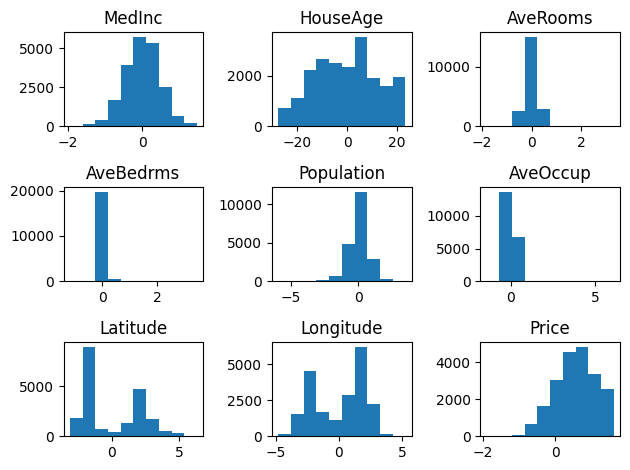

In [112]:
plt.subplot(3, 3, 1)
plt.hist(X_df_Log_center['MedInc_Log_0'])
plt.title('MedInc')

plt.subplot(3, 3, 2)
plt.hist(X_df_Log['HouseAge_0'])
plt.title('HouseAge')

plt.subplot(3, 3, 3)
plt.hist(X_df_Log_center['AveRooms_Log_0'])
plt.title('AveRooms')

plt.subplot(3, 3, 4)
plt.hist(X_df_Log_center['AveBedrms_Log_0'])
plt.title('AveBedrms')

plt.subplot(3, 3, 5)
plt.hist(X_df_Log_center['Population_Log_0'])
plt.title('Population')

plt.subplot(3, 3, 6)
plt.hist(X_df_Log_center['AveOccup_Log_0'])
plt.title('AveOccup')

plt.subplot(3, 3, 7)
plt.hist(X_df_Log['Latitude_0'])
plt.title('Latitude')

plt.subplot(3, 3, 8)
plt.hist(X_df_Log['Longitude_0'])
plt.title('Longitude')

plt.subplot(3, 3, 9)
plt.hist(y_df['Price_Log'])
plt.title('Price')

plt.tight_layout()
plt.show()

## 3) 이상치 제거 

In [113]:
X_df_Log_center

,MedInc_Log_0,HouseAge_0,AveRooms_Log_0,AveBedrms_Log_0,Population_Log_0,AveOccup_Log_0,Latitude_0,Longitude_0
0,0.874822,12.360514,0.295869,-0.046698,-1.249564,-0.105040,2.248139,-2.660296
1,0.871959,-7.639486,0.182910,-0.098751,0.759525,-0.296697,2.228139,-2.650296
2,0.737557,23.360514,0.467054,0.000646,-0.817540,-0.012884,2.218139,-2.670296
3,0.485969,23.360514,0.113074,0.000285,-0.699757,-0.108023,2.218139,-2.680296
4,0.102621,23.360514,0.189894,0.007733,-0.687290,-0.263312,2.218139,-2.680296
...,...,...,...,...,...,...,...,...
20635,-0.799587,-3.639486,-0.029284,0.054934,-0.284779,-0.103066,3.848139,-1.520296
20636,-0.305709,-10.639486,0.162815,0.204208,-1.149185,0.095422,3.858139,-1.640296
20637,-0.713837,-11.639486,0.001953,0.043182,-0.109385,-0.199317,3.798139,-1.650296
20638,-0.620025,-10.639486,0.025488,0.088415,-0.416115,-0.290381,3.798139,-1.750296


In [114]:
import seaborn as sns

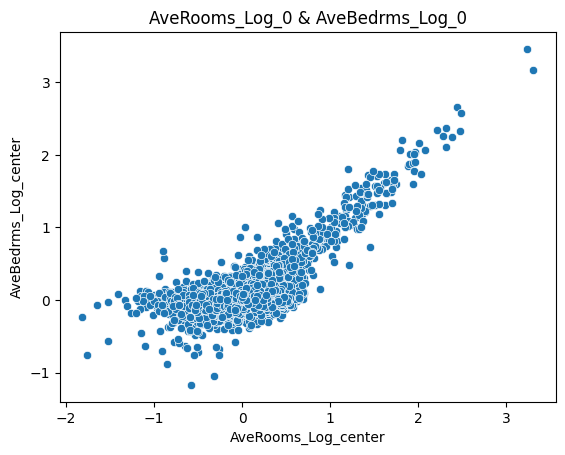

In [122]:
plt.title('AveRooms_Log_0 & AveBedrms_Log_0')
plt.xlabel('AveRooms_Log_center')
plt.ylabel('AveBedrms_Log_center')
sns.scatterplot(x=X_df_Log_center['AveRooms_Log_0'],y=X_df_Log_center['AveBedrms_Log_0'])
plt.show()

In [135]:
X_df_Log_0_AveRooms = X_df_Log_center['AveRooms_Log_0'][:-2]
X_df_Log_0_AveRooms

0        0.295869
1        0.182910
2        0.467054
3        0.113074
4        0.189894
           ...   
20633    0.046931
20634    0.266068
20635   -0.029284
20636    0.162815
20637    0.001953
Name: AveRooms_Log_0, Length: 20638, dtype: float64

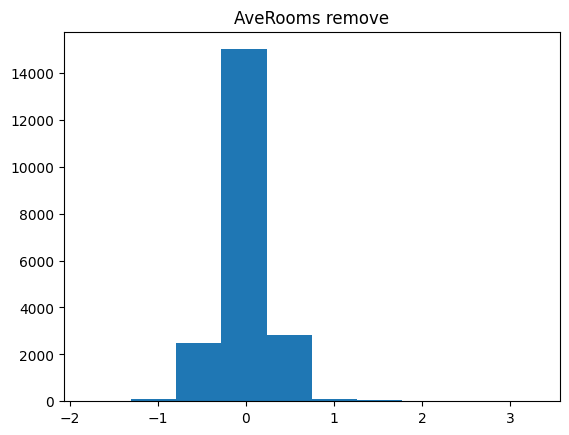

In [150]:
plt.title('AveRooms remove')
plt.hist(X_df_Log_0_AveRooms)
plt.show()

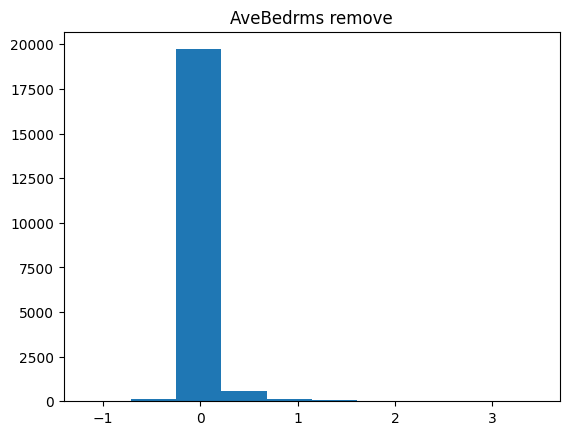

In [151]:
X_df_Log_0_AveBedrms = X_df_Log_center['AveBedrms_Log_0'][:-2]
X_df_Log_0_AveBedrms

plt.title('AveBedrms remove')
plt.hist(X_df_Log_0_AveBedrms)
plt.show()

# 회귀분석 진행 

In [153]:
import pandas as pd
import statsmodels.api as sm

# 데이터 추출
X_df_Log_centered = X_df_Log_center[['MedInc_Log_0', 'HouseAge_0', 'AveRooms_Log_0', 'AveBedrms_Log_0', 'Population_Log_0', 'AveOccup_Log_0', 'Latitude_0', 'Longitude_0']]
y_df = y_df[['Price_Log']]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_df_Log_centered, y_df, test_size=0.2, random_state=42)

# statsmodels는 절편(intercept)를 자동으로 추가하지 않으므로 수동으로 추가
X_train_with_intercept = sm.add_constant(X_train)
X_test_with_intercept = sm.add_constant(X_test)

# 모델 생성 및 학습
model = sm.OLS(y_train, X_train_with_intercept)
results = model.fit()

# 모델 요약 결과 출력
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_Log   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     4307.
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:08:57   Log-Likelihood:                -4809.6
No. Observations:               16512   AIC:                             9637.
Df Residuals:                   16503   BIC:                             9707.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5715      0.003  

In [154]:
# 모델 로드
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=0.1) #alpha는 계수에 대한 규제 정도를 나타냄. 값이 높을수록 규제 정도가 커짐.
lasso_reg = Lasso(alpha=0.01) #alpha는 계수에 대한 규제 정도를 나타냄. 값이 높을수록 규제 정도가 커짐.

# 모델 학습
lin_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

# 예측 및 성능 평가
for model in [lin_reg, ridge_reg, lasso_reg]:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__} MSE: {mse}")

LinearRegression MSE: 0.11009124616206975
Ridge MSE: 0.11009018491658575
Lasso MSE: 0.11537584733200192


In [155]:
# 모델 정의
gb_reg = GradientBoostingRegressor()
xgb_reg = XGBRegressor()
lgb_reg = LGBMRegressor()

# 모델 학습
gb_reg.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train)
lgb_reg.fit(X_train, y_train)

# 예측 및 성능 평가
for model in [gb_reg, xgb_reg, lgb_reg]:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__} MSE: {mse}")

/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000603 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 0.573569
GradientBoostingRegressor MSE: 0.06744890535734453
XGBRegressor MSE: 0.05217331646109136
LGBMRegressor MSE: 0.05268232685797776
